In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('../data/internet_service_churn_scaled.csv')

In [59]:
df.head()

is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0          0.476083                    -0.708273          4.684387   
1         -2.100476                    -0.708273          2.844086   
2          0.476083                    -0.708273          3.184517   
3         -2.100476                    -0.708273          2.178025   
4         -2.100476                    -0.708273          1.941204   

   reamining_contract  download_avg  upload_avg  download_over_limit  churn  
0           -0.537157     -0.556575   -0.192699            -0.208788    0.0  
1           -0.747446     -0.689055   -0.426943            -0.208788    1.0  
2           -0.747446     -0.472986   -0.335282            -0.208788    1.0  
3           -0.747446     -0.689055   -0.426943            -0.208788    1.0  
4           -0.747446     -0.689055   -0.426943            -0.208788    1.0

In [60]:
df_X = df.drop(['churn'], axis=1)
df_y = df['churn']

In [61]:
from sklearn.model_selection import train_test_split

_, X_test, _, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [62]:
import os
import joblib
from pathlib import Path
import time
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

dir = '../models/'
list_of_models = os.listdir(dir)

sizes = []
times_of_exec = []
metrics = []
for model_file in list_of_models:
    path = dir + model_file
    model_name = Path(path).stem
    size = os.path.getsize(path)
    model = joblib.load(path)
    sizes.append([model_name, size/1024])

    start_time = time.time()
    y_pred = model.predict(X_test)
    times_of_exec.append([model_name, time.time() - start_time])
    metrics.append([model_name, precision_recall_curve(y_test, y_pred)])

/Users/bohdanh/projects/GoIT/Python/goit-telecom-project-group-1/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [63]:
sizes

[['logistic_regression_model', 0.9404296875],
 ['decision_tree', 2.5048828125],
 ['svm_model_by_pipeline', 854.056640625],
 ['neural_model_MLP', 280.1953125],
 ['svm_model_rbf', 884.9638671875],
 ['svm_model_linear', 885.0263671875]]

In [64]:
times_of_exec

[['logistic_regression_model', 0.0012459754943847656],
 ['decision_tree', 0.0012600421905517578],
 ['svm_model_by_pipeline', 8.64733099937439],
 ['neural_model_MLP', 0.013007879257202148],
 ['svm_model_rbf', 4.622587203979492],
 ['svm_model_linear', 4.640749216079712]]

In [109]:
metrics

[['logistic_regression_model',
  (array([0.5632882, 0.8644813, 1.       ]),
   array([1.        , 0.92254507, 0.        ]),
   array([0., 1.]))],
 ['decision_tree',
  (array([0.5632882 , 0.94963186, 1.        ]),
   array([1.        , 0.93423327, 0.        ]),
   array([0., 1.]))],
 ['svm_model_by_pipeline',
  (array([0.5632882 , 0.91260722, 1.        ]),
   array([1.        , 0.92830686, 0.        ]),
   array([0., 1.]))],
 ['neural_model_MLP',
  (array([0.5632882 , 0.95301786, 1.        ]),
   array([1.        , 0.92666063, 0.        ]),
   array([0., 1.]))],
 ['svm_model_rbf',
  (array([0.5632882 , 0.82172402, 1.        ]),
   array([1.        , 0.81759816, 0.        ]),
   array([0., 1.]))],
 ['svm_model_linear',
  (array([0.5632882 , 0.82193709, 1.        ]),
   array([1.        , 0.81726891, 0.        ]),
   array([0., 1.]))]]

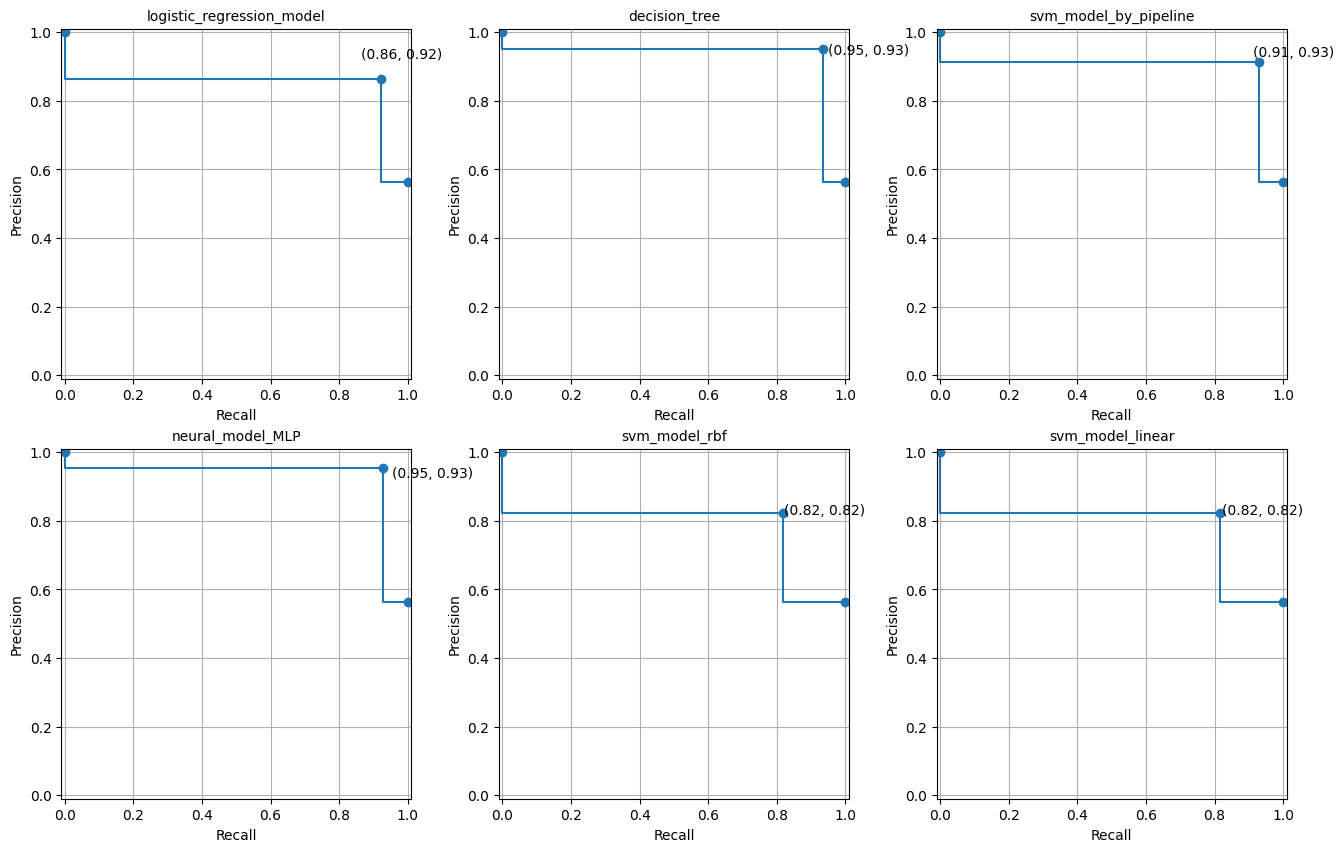

In [122]:
import matplotlib.pyplot as plt

length = len(metrics)
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(16)
fig.set_figheight(10)

for i in range(0, length):
    name, (precis, recall, _) = metrics[i]
    disp = PrecisionRecallDisplay(precis, recall)
    row = 0 if i < 3 else 1
    col = i if i < 3 else i - 3
    ax = axs[row, col]
    ax.grid()
    ax.annotate(text=f'({precis[1]:.2f}, {recall[1]:.2f})', xy=(precis[1], recall[1]))
    ax.set_title(name, size=10)
    disp.plot(ax=ax, marker='o')


### –ì—Ä–∞—Ñ—ñ–∫ Precision-Recall
**X-–≤—ñ—Å—å:** –ø–æ–∫–∞–∑—É—î –∑–Ω–∞—á–µ–Ω–Ω—è –ø–æ–≤–Ω–æ—Ç–∏ (Recall).

**Y-–≤—ñ—Å—å:** –ø–æ–∫–∞–∑—É—î –∑–Ω–∞—á–µ–Ω–Ω—è —Ç–æ—á–Ω–æ—Å—Ç—ñ (Precision).

–ù–∞ –≥—Ä–∞—Ñ—ñ–∫—É –≤—ñ–¥–æ–±—Ä–∞–∂–∞—î—Ç—å—Å—è –∑–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ —Ç–æ—á–Ω—ñ—Å—Ç—é —Ç–∞ –ø–æ–≤–Ω–æ—Ç–æ—é –ø—Ä–∏ —Ä—ñ–∑–Ω–∏—Ö –ø–æ—Ä–æ–≥–∞—Ö –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ–π–Ω–æ—ó –º–æ–¥–µ–ª—ñ.

### –Ü–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü—ñ—è
**–í–∏—Å–æ–∫–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å –ø—Ä–∏ –Ω–∏–∑—å–∫—ñ–π –ø–æ–≤–Ω–æ—Ç—ñ:** –æ–∑–Ω–∞—á–∞—î, —â–æ –º–æ–¥–µ–ª—å —Ä–æ–±–∏—Ç—å –º–∞–ª–æ –ø–æ–º–∏–ª–∫–æ–≤–∏—Ö –ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å, –∞–ª–µ —Ç–∞–∫–æ–∂ –º–æ–∂–µ –ø—Ä–æ–ø—É—Å—Ç–∏—Ç–∏ –±–∞–≥–∞—Ç–æ —Å–ø—Ä–∞–≤–∂–Ω—ñ—Ö –ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö –≤–∏–ø–∞–¥–∫—ñ–≤.

**–í–∏—Å–æ–∫–∞ –ø–æ–≤–Ω–æ—Ç–∞ –ø—Ä–∏ –Ω–∏–∑—å–∫—ñ–π —Ç–æ—á–Ω–æ—Å—Ç—ñ:** –º–æ–¥–µ–ª—å –∑–Ω–∞—Ö–æ–¥–∏—Ç—å –º–∞–π–∂–µ –≤—Å—ñ —Å–ø—Ä–∞–≤–∂–Ω—ñ –ø–æ–∑–∏—Ç–∏–≤–Ω—ñ –≤–∏–ø–∞–¥–∫–∏, –∞–ª–µ —Ä–æ–±–∏—Ç—å –±–∞–≥–∞—Ç–æ –ø–æ–º–∏–ª–∫–æ–≤–∏—Ö –ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å.

### –£ –≤–∏—Å–Ω–æ–≤–∫—É
–í–∏—Å–æ–∫–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å (–±—ñ–ª—è 1.0) —Ç–∞ –≤–∏—Å–æ–∫–∞ –ø–æ–≤–Ω–æ—Ç–∞ (–±—ñ–ª—è 1.0) –¥–µ–º–æ–Ω—Å—Ç—Ä—É—é—Ç—å, —â–æ –º–æ–¥–µ–ª—å –¥–æ–±—Ä–µ –≤–∏—è–≤–ª—è—î –ø–æ–∑–∏—Ç–∏–≤–Ω—ñ –≤–∏–ø–∞–¥–∫–∏ —ñ –ø—Ä–∏ —Ü—å–æ–º—É –º–∞—î –Ω–∏–∑—å–∫–∏–π —Ä—ñ–≤–µ–Ω—å –ø–æ–º–∏–ª–∫–æ–≤–∏—Ö –ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤.
–ì—Ä–∞—Ñ—ñ–∫–∏ –ø–æ–∫–∞–∑—É—é—Ç—å, —â–æ –Ω–∞ —Ä—ñ–≤–Ω—ñ –≤–∏—Å–æ–∫–æ—ó –ø–æ–≤–Ω–æ—Ç–∏ —Ç–æ—á–Ω—ñ—Å—Ç—å —Ç–∞–∫–æ–∂ –∑–∞–ª–∏—à–∞—î—Ç—å—Å—è –≤–∏—Å–æ–∫–æ—é.

**–ù–∞–ø—Ä–∏–∫–ª–∞–¥:** `logistic_regression_model` –ø–æ–∫–∞–∑–∞–ª–∞ –º–µ–Ω—à—É —Ç–æ—á–Ω—ñ—Å—Ç—å 0.86 –ø—Ä–∏ –ø–æ–≤–Ω–æ—Ç—ñ 0.92 (–¥–æ–≤–≥–∞ –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–∞ –ª—ñ–Ω—ñ—è –Ω–∞ –≥—Ä–∞—Ñ—ñ–∫—É), —â–æ –≤ –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—ñ –∑ –º–æ–¥–µ–ª—è–º–∏ `decision_tree`, `neural_model_MLP` —è–∫—ñ –ø–æ–∫–∞–∑–∞–ª–∏ —Ç–æ—á–Ω—ñ—Ç—å 0.95 –ø—Ä–∏ –ø–æ–≤–Ω–æ—Ç—ñ 0.93.


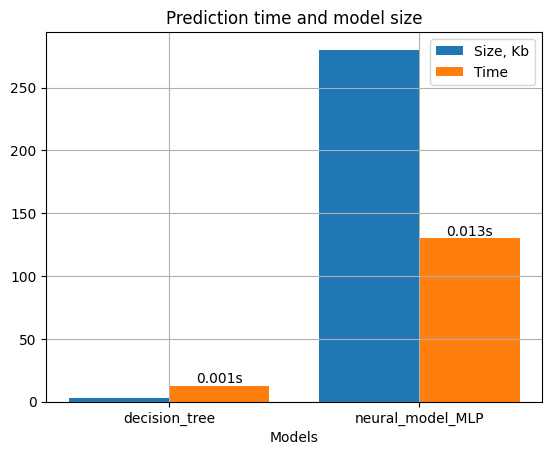

In [209]:
import numpy as np

# –ø–æ–±—É–¥—É–≤–∞—Ç–∏ –≥—Ä–∞—Ñ—ñ–∫ —Ç—ñ–ª—å–∫–∏ —Ç–∏—Ö –º–æ–¥–µ–ª–µ–π, —è–∫—ñ –ø–æ–∫–∞–∑–∞–ª–∏ –∫—Ä–∞—â–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç Decision-Recall
includes = [
    'decision_tree',
    'neural_model_MLP'
]

labels = [s[0] for s in sizes if s[0] in includes]
size = [s[1] for s in sizes if s[0] in includes]
t_sec = [t[1] for t in times_of_exec if t[0] in includes]
# –∑–Ω–∞—á–µ–Ω–Ω—è –Ω–∞—Å—Ç—ñ–ª—å–∫–∏ –º–∞–ª—ñ, —Ç–æ–º—É –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç—ñ –≤–∏—Å–æ—Ç–∞ —Å—Ç–æ–≤–ø—á–∏–∫—ñ–≤ 
# —Å–∏–Ω—Ç–µ—Ç–∏—á–Ω–æ –∑–±—ñ–ª—å—à–µ–Ω–∞, –∞–ª–µ –∑–Ω–∞—á–µ–Ω–Ω—è —Ä–µ–∞–ª—å–Ω—ñ
t_pseudo = [t * 10000 for t in t_sec]
time_bar_labels = [f'{t:.3f}s' for t in t_sec]

X_axis = np.arange(len(labels))
fig, ax = plt.subplots()

size_bar = plt.bar(X_axis - 0.2, size, 0.4, label = 'Size, Kb')
time_bar = ax.bar(X_axis + 0.2, t_pseudo, 0.4, label = 'Time')
ax.bar_label(time_bar, labels=time_bar_labels)



plt.xticks(X_axis, labels) 
plt.xlabel("Models") 
plt.title("Prediction time and model size") 
plt.grid()
plt.legend()
plt.show()

### –£ –≤–∏—Å–Ω–æ–≤–∫—É
–º–∞—î–º–æ –æ–¥–Ω—É –º–æ–¥–µ–ª—å `decision_tree`, —è–∫–∞ —à–≤–∏–¥—à–µ –≤–∏–∫–æ–Ω—É—î—Ç—å—Å—è, –º–µ–Ω—à–µ –≤–∞–∂–∏—Ç—å —ñ –º–∞—î –∫—Ä–∞—â—ñ –ø–æ–∫–∞–∑–Ω–∏–∫–∏ Decision-Recall üç∫üç∫üç∫üç∫